# Sprint 2

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

import utils

In [41]:
df = utils.import_attrition_data()
df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1


# AT21

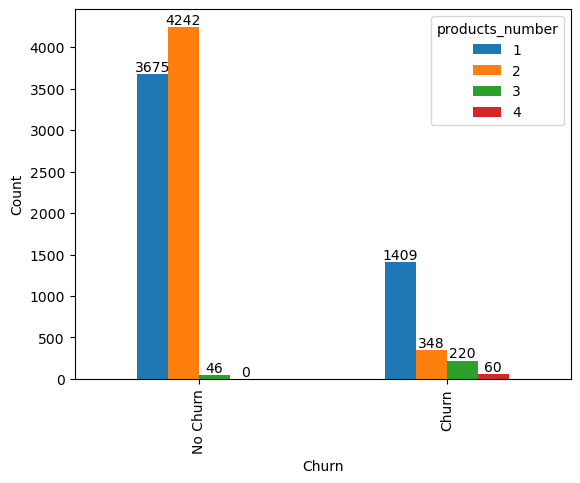

In [49]:
df_agg = df.pivot_table(index="churn", columns=["products_number"], aggfunc="size")

df_agg.fillna(0, inplace=True)

ax = df_agg.plot.bar()

ax.set_xticklabels(["No Churn", "Churn"])
ax.set_xlabel("Churn")
ax.set_ylabel("Count")

for i in ax.containers:
    ax.bar_label(i)


plt.show()